# Lab2. Pichu eller Pikachu? 

- Uppgift att utifrån givna data avgöra om en testpunkt är Pichu eller Pikachu. Dock har tanken att kunna utöka till fler (alla) pokemons varit ledande i designval, som val av datastrukturer mm.
- Under funktioner finns en testkod för att kunna testa hur just den funktionen fungerar. Den gör allså inget för själva programmet. Normalt skulle jag ta bort den koden. Men jag tänkte det kunde vara bra för att förtydliga vad varje funktion gör. Möjligen ser det lite rörigare ut men "collapse" är bra. 




#### Kvar att göra:

- beskrivningar och --> typ på funktioner
- Legend på plottar
- Axlar på plottar


- Kolla igenom hela koden 

## Importera bibliotek

In [279]:
import matplotlib.pyplot as plt
import random as rnd


## Funktioner

### Läs in data från fil

In [21]:
# Funktion som tar sökvägen till en textfil med pokemondata som argument.
# Läser in datan och returnerar en lista med datapunkter. Varje datapunkt är också en lista med tre värden bredd, höd och vilken pokemon.

def poke_lasin(poke_path):
    with open(poke_path,'r') as f: # Läser in filen och tilldelar innehållet till raa_data
        raa_data = f.readlines()
    

    pokemon = poke_path[ poke_path.rfind('/') + 1 : -4 ] # läs in vilken pokemon det är från namnet på textfilen

    rensad_data = [] # Initera tom lista

    for rad in raa_data[1:]: # [0] inhåller överskrifter som vi inte vill ha med
        
        rad = rad.split(sep=", ") # Dela upp strängen per ", "
        rensad_data.append([float(rad[0][1:]), float(rad[1][:-2]), pokemon]) # Rensa bort onödiga tecken och typomvandla till flyttal. Lägg till i rensad_data.        

    return(rensad_data)


In [22]:
# Test av poke_lasin
# Endast för att kontrollera om fungerar som tänkt och läse in filen korrekt. Används inte i programmet

path_pichu = "files/pichu.txt"
d = poke_lasin(path_pichu)

# print(d) # Skriv ut data. Avstängd för det blir så mycket text
print(d[0][2]) # skrvi ut vilken pokemon
print(len(d)) # Skriv ut längden (antalet datapunkter) på d. 50 i givna filer.

# Jämför första och sista datapunkt mot värden i filen pichu.txt
print(d[0][0] == 20.11541438766307)
print(d[0][1] == 28.701809671168824)
print(d[-1][0] == 17.918657431760675)
print(d[-1][1] == 33.60779702234498)

pichu
50
True
True
True
True


In [23]:
# Funktion som tar sökvägen till en textfil med testdata som argument.
# Läser in datan och returnerar en lista med datapunkter. Varje datapunkt är också en lista med två värden.

def testpunkter_lasin(testp_path):

    with open(testp_path,'r') as f:     # Läser in filen och tilldelar innehållet till raa_data
        raa_data = f.readline()

    rensad_data = raa_data[1:-1].split(sep = "), (")    # Delar upp strängen per data par och tar bort parenteser.
    
    for i,p in enumerate(rensad_data): 
        p = p.split(sep=",")                                            # Dela upp strängen per ", "
        rensad_data[i] = ([float(p[0].strip()), float(p[1].strip())])   # Rensa bort blanksteg och typomvandla till flyttal.        
    
    return(rensad_data)


In [24]:
# Testar funktionen testpunkter_lasin()
testpunkter_lasin("files/test_points.txt")

[[25.0, 35.0], [15.0, 14.0], [26.0, 30.0], [22.0, 45.0]]

### Visa pokemons avatar

In [46]:
# Visa en avatar för vald pokemon
# För att det är kul
# Bygger löst på den här sidan https://stackoverflow.com/questions/35286540/display-an-image-with-python

def visa_avatar(pokemon):
    '''Visar en avatar för en pokemon'''
    #import matplotlib.pyplot as plt
    
    pokemons = {"Pichu":"files/Pichu.png", "Pikachu" : "files/Pikachu.png", "Okänd" : "files/Okand.jpg"} # Dictionary med namn på pokemon och sökväg till bild. Kanske overkill för två men funktionen skulle gå att utöka för alla pokemons.

    path = pokemons[pokemon]    # välj sökväg för vald pokemon

    plt.figure(figsize=(5,5))   # Sätt storlek på figuren
    plt.axis("off")             # Stäng av axlarna i figuren
    plt.title(pokemon)
    bild = plt.imread(path)     # Läs in och tillela bilden till bild
    plt.imshow(bild)            # Lägg till bild i figur

    plt.show() # Gör figuren synlig

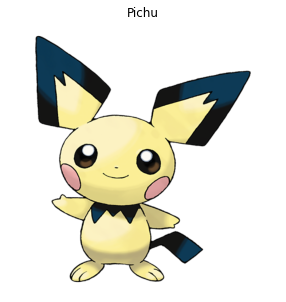

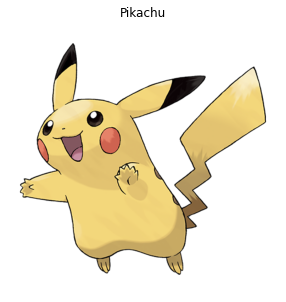

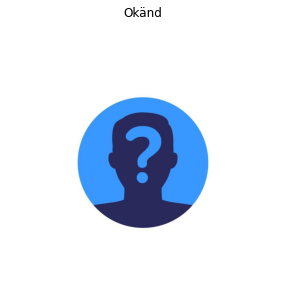

In [48]:
# Test av funktion visa_avatar()
visa_avatar("Pichu")
visa_avatar("Pikachu")
visa_avatar("Okänd")

### Plotta datapunkter

In [316]:
# Funktion för att plotta datapunkter

def plot_punkter(data, fmt):
    
    for d in data:
        plt.plot(d[0],d[1],fmt)
    

In [317]:
# Plotta alla punkter i en figur 

def plot_alla(punkter_pichu: list, punkter_pikachu: list, punkter_test):
    plot_punkter( punkter_pichu, "r*")
    plot_punkter( punkter_pikachu, "bo")
    plot_punkter( punkter_test, "cd")
    
    plt.xlabel("Bredd [cm]")
    plt.ylabel("Höjd [cm]")
    plt.title("Bredd och höjd för varje pokemon")
    plt.legend(("1", "2", "3"))
    plt.gca().set_aspect("equal") # Sätt förhållande mellan x- och y-axel lika. Löst baserat på https://www.pythonpool.com/matplotlib-aspect-ratio/
     
    plt.show()

    print("\n")


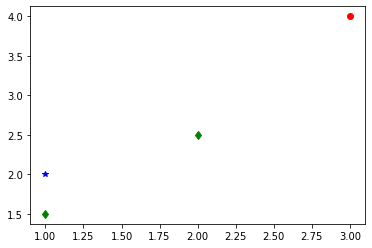

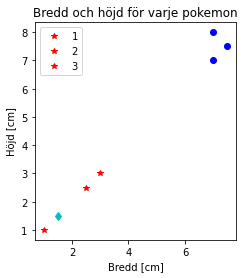

In [321]:
# Test av funktion plot_punkter()
plot_punkter([[3,4]], "ro")
plot_punkter([[1,2]], "b*")
plot_punkter([[2, 2.5],[1, 1.5]], "gd")
plt.show()

lista_data1 = [[1, 1, "Pikachu"], [2.5, 2.5, "Pikachu"], [3, 3, "Pikachu"]]
lista_data2 = [[7, 7, "Pichu"], [7.5, 7.5, "Pichu"], [7, 8, "Pichu"]]
lista_test = [[1.5, 1.5]]
plot_alla(lista_data1,lista_data2,lista_test)

### Beräkning av avstånd mellan punkter

In [29]:
# Funktion för beräkning av avstånd mellan två punkter

def euklidiskt_avstaand(p1, p2):
    '''Beräknar det euklidiska avståndet mellan p1 och p2'''
        
    import math as ma
    
    return ma.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )

In [30]:
# Funktion för att hitta de n minsta avstånden till en testpunkt
# 
def avstaand_punkter(p_test, punkter, n = 1):   
    avstaand =[]
    for p in punkter:
        avstaand.append( [euklidiskt_avstaand(p, p_test), p[2].title()] ) 
    avstaand.sort()       
    return avstaand[0:n]

In [263]:
# Test euklidiskt_avstaand()
print( euklidiskt_avstaand([0,0],[0,1]) )
print( euklidiskt_avstaand([1,1],[2,2]) )
print( euklidiskt_avstaand([0,0],[0,-2]) )
print( euklidiskt_avstaand([4,3],[0,0]) )

# Test avstaand_punkter()
p = poke_lasin("files/pichu.txt")
print(avstaand_punkter([20, 35],p))
print(avstaand_punkter([20, 35],p,3))

1.0
1.4142135623730951
2.0
5.0
[[0.30158264952968844, 'Pichu']]
[[0.30158264952968844, 'Pichu'], [0.8174899522820536, 'Pichu'], [1.5840400734809648, 'Pichu']]


### Avgöra vilken pokémon

In [327]:
#Funktion för att avgöra vilken pokemon det är utifrån de närmaste punkterna.

def poke_valj(punkter_test: list, punkter_data: list, n: int) -> list:
    '''Funktion som avgör vilken pokemon, utifrån en lista med minsta avstånd med tillhörande klassificering'''
    
    pokemons = []

    for p_t in punkter_test:
        
        min_avstand = avstaand_punkter(p_t, punkter_data, n) # Hittar den närmast punkten bland alla givna punkter
        
        #pokemon = poke_valj(min_avstand)
            # gör en lista med bara namnen
        pokemon = []
        for a in min_avstand: 
            pokemon.append(a[1])

        # Räkna antalet av varje pokemon i listan
        poke_antal ={}
        for p in set(pokemon):
            poke_antal[ p ] = pokemon.count(p)

        # Ta fram pokemon med det högsta antalet förekomster
        pokemon = max(poke_antal,key=poke_antal.get)

        # Kontrollera att det inte finns flera pokemons som förekommer lika många ggr
        for a in poke_antal:
            if  a != pokemon and poke_antal[a] == poke_antal[pokemon]:
                print(f"Det är går inte att avgöra vilken pokémon det är.")
                pokemon = "Okänd"
                break

        # Visa bilden på vald pokemon    
        visa_avatar(pokemon) 
        
        # Skriv ut vilken punkt och vald pokemon
        print(f"Punkt: {p_t} \nKlassificering: {pokemon}") #" \nAvstånd till närmast punkt: {min_avstand[0][0]}\n\n")
    
        # Skriv ut minsta avstånden och vad de punkterna är klassade som
        print(f"De {len(min_avstand)} närmaste avstånden är: ")
        for a in min_avstand:
            print(f"{a}")
        
        print("\n\n")
        pokemons.append(pokemon)
        

    return pokemons

Spännande hur n kan påverka resultet!
n= 1


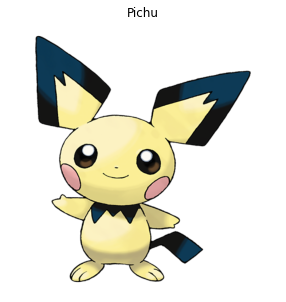

Punkt: [1.5, 1.5] 
Klassificering: Pichu
De 1 närmaste avstånden är: 
[0.7071067811865476, 'Pichu']



['Pichu']



n= 2
Det är går inte att avgöra vilken pokémon det är.


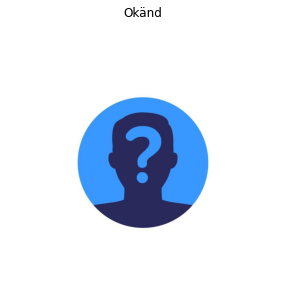

Punkt: [1.5, 1.5] 
Klassificering: Okänd
De 2 närmaste avstånden är: 
[0.7071067811865476, 'Pichu']
[1.4142135623730951, 'Pikachu']



['Okänd']



n= 3


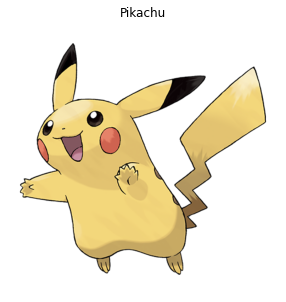

Punkt: [1.5, 1.5] 
Klassificering: Pikachu
De 3 närmaste avstånden är: 
[0.7071067811865476, 'Pichu']
[1.4142135623730951, 'Pikachu']
[2.1213203435596424, 'Pikachu']



['Pikachu']





In [326]:
# Test av funktion poke_valj() 
lista_data = [[1, 1, "Pichu"], [2.5, 2.5, "Pikachu"], [3, 3, "Pikachu"]]
lista_test = [[1.5, 1.5]]

print("Spännande hur n kan påverka resultet!")
for n in range(1,3+1):
    print(f"n= {n}")
    print(poke_valj(lista_test, lista_data, n))
    print("\n\n")



### Inmatning från användare

In [32]:
# Funktion för att mata in en testpunkt från användaren

def  mata_in_punkt():
    '''Tar in en punkt från användaren. Returnerar en list [bredd, höjd]'''
    max_storlek = 50 # Vad är ett rimligt värde här egentligen?
    
    punkt = []
    for f in ("bredden", "höjden"):
        
        while True:
            
            try:
                svar = float(input(f"Ange {f} för din pokemon: "))
                if svar <= 0:
                    raise ValueError("Måtten ska vara större än 0.")
                elif svar > max_storlek:
                    raise ValueError("Så stor är en pokemon inte.") 
            except ValueError as err:
                print(err)
            except:
                print("Övrigt fel")
            else:
                break

        punkt.append(svar)    

    return punkt

In [15]:
# Test av funktion mata_in_punkt()

p = mata_in_punkt()
print(p)


[25.0, 25.0]


### Skapa uppdelning i övningsdata och testdata

In [209]:
# Funktion för att slumpmässigt uppdelning av en lista i test- och övningdata
def delaupp_data(data_punkter, andel) -> list:
    '''Funktion som tar in en lista med datapunkter och delar upp den i test- och övningsdata. 
        Andel anger hur stor andel (0 till 1) som skall vara testdata'''

    # rnd.seed(6.28318530718) 

    rnd.shuffle(data_punkter) # Blanda listan (för att få ett randoniserat urval)
    cut =int(len(data_punkter) * andel) # Beräkna var listan ska klippas utifrån angiven andel testdata

    # Dela upp datan i två listor
    tranings_p = data_punkter[:cut]     
    test_p = data_punkter[cut :]

    return [tranings_p, test_p]

In [210]:
# Test av funktion delaupp_data()

lista = [[1, 2, "p"], [3, 4, "p"], [5, 6, "p"], [7, 8, "p"]]
print(lista)
[tr_p, te_p] = delaupp_data(lista, 0.90 )
print(tr_p)
print(te_p)

[[1, 2, 'p'], [3, 4, 'p'], [5, 6, 'p'], [7, 8, 'p']]
[[1, 2, 'p'], [3, 4, 'p'], [5, 6, 'p']]
[[7, 8, 'p']]


## Huvudprogram

### Main. Grunduppgift

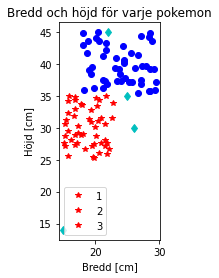

In [322]:
# Main
#Grundupgift

# Sökvägar till filer
path_pichu = "files/pichu.txt"
path_pikachu = "files/pikachu.txt"
path_test = "files/test_points.txt"

# Läs in textfiler med data
punkter_pichu = poke_lasin(path_pichu)
punkter_pikachu = poke_lasin(path_pikachu)
punkter_test = testpunkter_lasin(path_test)

# Plotta alla punkter i en figur <---------------------- funktion?
plot_alla(punkter_pichu, punkter_pikachu, punkter_test)
#plot_punkter( punkter_pichu, "r*")
#plot_punkter( punkter_pikachu, "bo")
#plot_punkter( punkter_test, "cd")
#plt.show()
#print("\n")


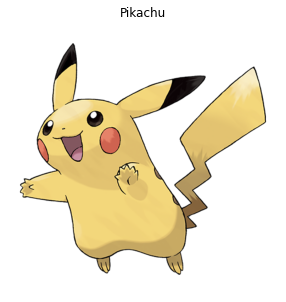

Punkt: [25.0, 35.0] 
Klassificering: Pikachu
De 1 närmaste avstånden är: 
[1.8304663206363925, 'Pikachu']


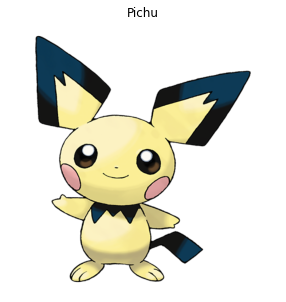

Punkt: [15.0, 14.0] 
Klassificering: Pichu
De 1 närmaste avstånden är: 
[11.652774129430805, 'Pichu']


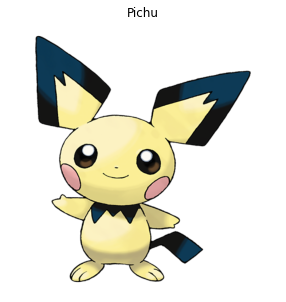

Punkt: [26.0, 30.0] 
Klassificering: Pichu
De 1 närmaste avstånden är: 
[3.686062473303827, 'Pichu']


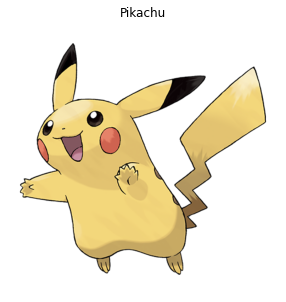

Punkt: [22.0, 45.0] 
Klassificering: Pikachu
De 1 närmaste avstånden är: 
[1.586203468458903, 'Pikachu']





In [274]:
# forts Main

# Avgör vilken pokemon varje testpunkt motsvarar    
poke_valj(punkter_test, punkter_pichu + punkter_pikachu, 1)
                 

### Forts Main. Uppgift 1 och 2

[20.0, 36.0]


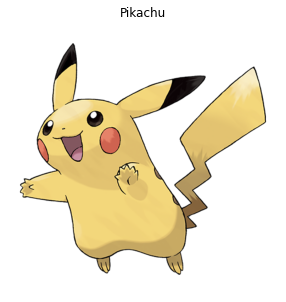

Punkt: [20.0, 36.0] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[0.3632325921139259, 'Pikachu']
[1.220117499959537, 'Pikachu']
[1.2920466486257307, 'Pichu']
[1.6763339569969409, 'Pichu']
[1.7665457307244206, 'Pikachu']





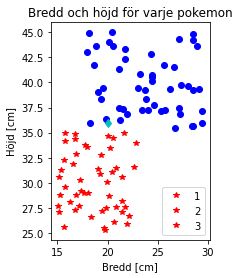

In [277]:
# forts Main
#  Uppgift 1 och 2

# n = 4, bredd = 20 och höjd = 36 -> Okänd då det blir lika många 2 punkter av varje som är närmast

# Ta in data från användaren
test_punkt = mata_in_punkt()
print(test_punkt)

# Avgör vilken pokemon det är
poke_valj([test_punkt], punkter_pichu + punkter_pikachu, 5)


# Printa lite grejor. Funktion på det ????
plot_punkter( punkter_pichu, "r*")
plot_punkter( punkter_pikachu, "bo")
plot_punkter( [test_punkt], "cd")
plt.show()
    
print("\n\n")    

 

### Forts Main. Uppgift 3


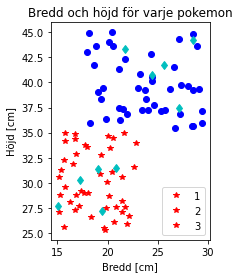

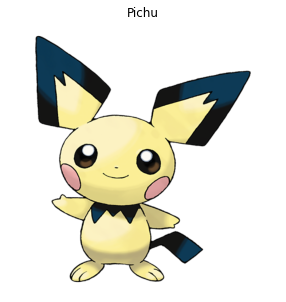

Punkt: [19.416325050185815, 27.193207591572833, 'pichu'] 
Klassificering: Pichu
De 5 närmaste avstånden är: 
[0.4955140854370901, 'Pichu']
[1.181635802073764, 'Pichu']
[1.486365502056798, 'Pichu']
[1.6406693144237225, 'Pichu']
[1.662710478807341, 'Pichu']





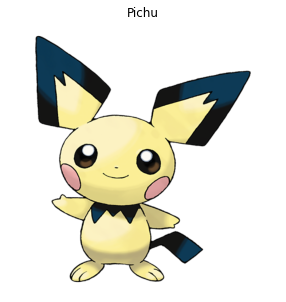

Punkt: [17.223788824880735, 30.29114345099137, 'pichu'] 
Klassificering: Pichu
De 5 närmaste avstånden är: 
[1.07343481952586, 'Pichu']
[1.4148098234354105, 'Pichu']
[1.5185960015963158, 'Pichu']
[1.5263571214062637, 'Pichu']
[1.6113191609225022, 'Pichu']





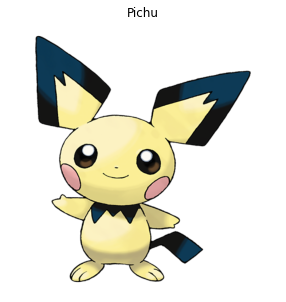

Punkt: [15.051990077424488, 27.67740875975703, 'pichu'] 
Klassificering: Pichu
De 5 närmaste avstånden är: 
[0.6008747684714626, 'Pichu']
[1.1325876510561694, 'Pichu']
[1.2809390858834604, 'Pichu']
[1.7547264796498476, 'Pichu']
[2.0428535235401344, 'Pichu']





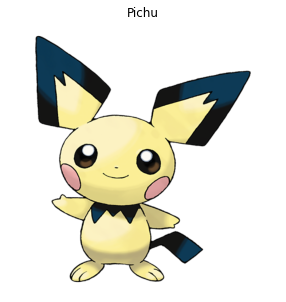

Punkt: [20.8917697133121, 31.480353852465935, 'pichu'] 
Klassificering: Pichu
De 5 närmaste avstånden är: 
[0.6164456759314861, 'Pichu']
[1.034715478366933, 'Pichu']
[1.6759713227150264, 'Pichu']
[1.7230235915945102, 'Pichu']
[1.767486011442937, 'Pichu']





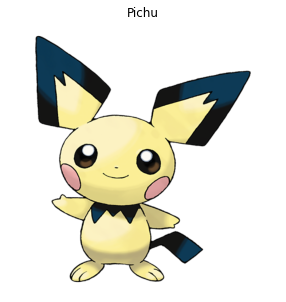

Punkt: [19.042842304826898, 31.399997598540928, 'pichu'] 
Klassificering: Pichu
De 5 närmaste avstånden är: 
[0.6066868266413072, 'Pichu']
[1.3963869058300107, 'Pichu']
[1.4050812843019629, 'Pichu']
[1.5880582734312536, 'Pichu']
[2.3349036601277673, 'Pichu']





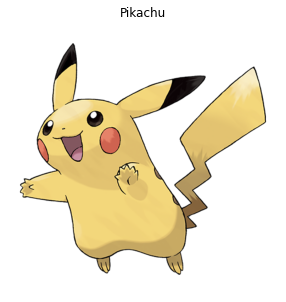

Punkt: [28.46919649302309, 44.23265599276013, 'pikachu'] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[0.6126617234133289, 'Pikachu']
[0.798454609221842, 'Pikachu']
[1.3247416303836397, 'Pikachu']
[3.28457322083417, 'Pikachu']
[4.332771700553609, 'Pikachu']





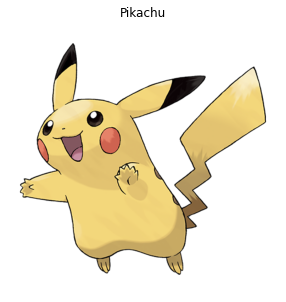

Punkt: [24.472548361435507, 40.710430933252844, 'pikachu'] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[0.20718019947512273, 'Pikachu']
[0.5354532387424142, 'Pikachu']
[1.2671828406557957, 'Pikachu']
[1.6782493128235234, 'Pikachu']
[1.8925864804422543, 'Pikachu']





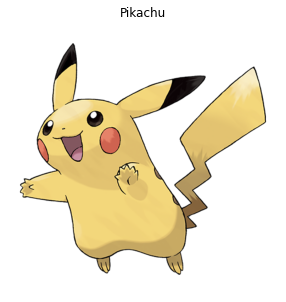

Punkt: [25.66739393839206, 41.68977778296281, 'pikachu'] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[0.9996832561242798, 'Pikachu']
[1.6845997028295818, 'Pikachu']
[1.7422682393520366, 'Pikachu']
[1.94674565833271, 'Pikachu']
[2.365111810464163, 'Pikachu']





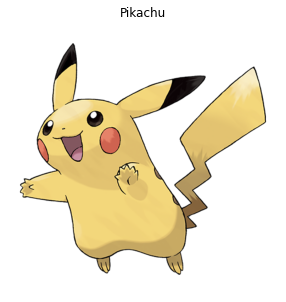

Punkt: [21.74059549561074, 43.36027585079952, 'pikachu'] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[1.0707054477124998, 'Pikachu']
[1.2254630858835425, 'Pikachu']
[1.7410383950194497, 'Pikachu']
[2.10370342941199, 'Pikachu']
[2.1297242784218615, 'Pikachu']





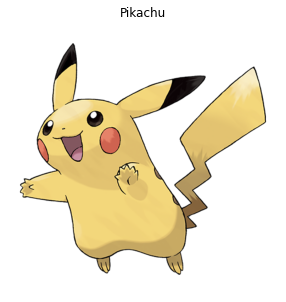

Punkt: [27.12722598308678, 37.48656333920286, 'pikachu'] 
Klassificering: Pikachu
De 5 närmaste avstånden är: 
[0.5878370378415315, 'Pikachu']
[1.4555387490429166, 'Pikachu']
[1.8518515861497793, 'Pikachu']
[2.014585952669269, 'Pikachu']
[2.117814268293398, 'Pikachu']





In [328]:
# forts Main
# Uppgift 3
# 90 är träningsdata (45 Pikachu, 45 Pichu)
# 10 är testdata (5 Pikachu, 5 Pichu)

andel_traningsdata= 0.90

[pichu_data, pichu_test] = delaupp_data(punkter_pichu,andel_traningsdata)
[pikachu_data, pikachu_test] = delaupp_data(punkter_pikachu,andel_traningsdata)

punkter_data = pichu_data + pikachu_data
punkter_test = pichu_test + pikachu_test
#print(f)

# Plotta alla punkter i en figur
plot_alla(pichu_data, pikachu_data, punkter_test)

# Avgör vilken pokemon det är
pokemons = poke_valj(punkter_test, punkter_data, 5)


### Forts Main. Uppgift 4

In [314]:
# forts Main
# Uppgift 4
# accuracy = (#TP + #TN) / Total - täljaren motsvarar alla rätt klassificerade pokemons

# Beräkna antalet rätt svar
antal_ratt = 0
for i, p in enumerate(pokemons):
    if p == punkter_test[i][2].title(): 
        antal_ratt += 1 

accuracy = antal_ratt/len(punkter_test)
print(f"Andel korrekt klassificerade pokemons är {accuracy} stycken.")

Andel korrekt klassificerade pokemons är 1.0 stycken.
